# Разведывательный анализ данных (Exploratory Data Analysis) #

## Полезные настройки для графики ##

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
# print(plt.style.available)
plt.style.use('seaborn-v0_8-notebook')
import warnings
warnings.filterwarnings('ignore')

## Построение разных графиков ##

### Круговые диаграммы ###

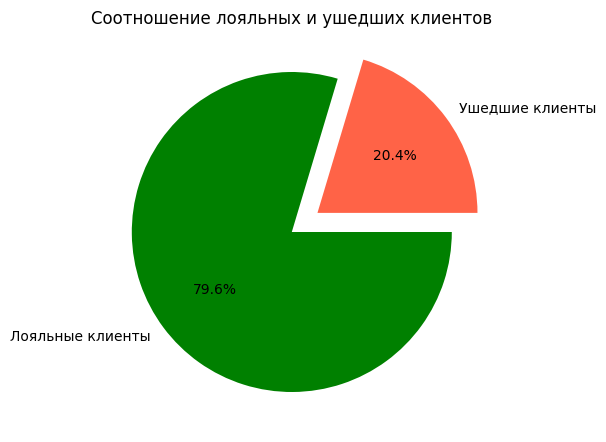

In [5]:
data1_df = pd.read_csv('data/data1_churn.csv')

exited_clients = data1_df[data1_df.Exited == 1].Exited.shape[0]
loyal_clients = data1_df.shape[0] - exited_clients

loyalty_pic = plt.figure(figsize=(4, 5))
axes = loyalty_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[loyal_clients, exited_clients],
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=['green', 'tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('Соотношение лояльных и ушедших клиентов');

### Гистограмма численности значений признака ###

In [ ]:
import seaborn as sns

sns.countplot(
    data=data_df,
    x='Имя_признака'
);

### Гистограммы и боксы в разных сочетаниях ###

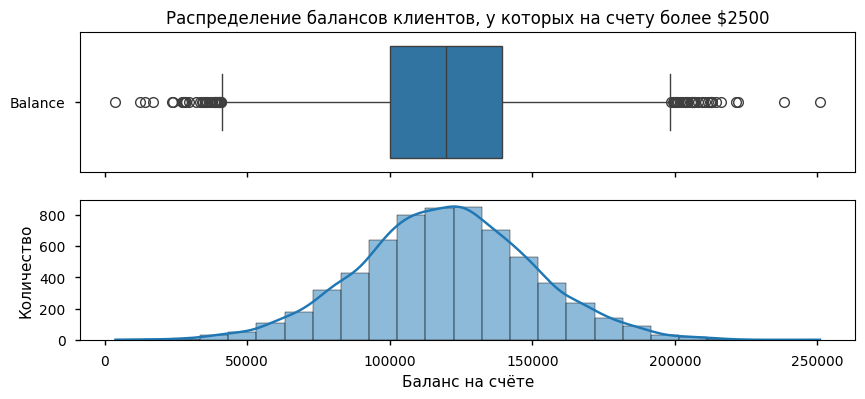

In [6]:
tmp_ser = data1_df[data1_df.Balance > 2500][['Balance']]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
sns.boxplot(
    data=tmp_ser,
    orient='h',
    ax=ax1
)
sns.histplot(
    data=tmp_ser,
    bins=25,
    kde=True,
    legend=False,
    ax=ax2
)
ax1.set_title('Распределение балансов клиентов, у которых на счету более $2500')
ax1.set_xlabel('')
ax2.set_xlabel('Баланс на счёте')
ax2.set_ylabel('Количество');

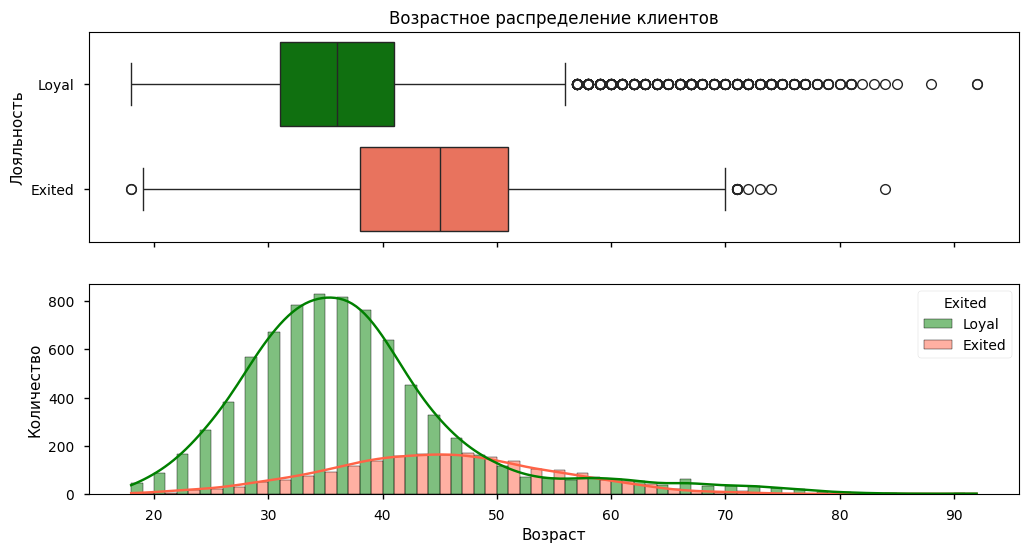

In [15]:
tmp_df = data1_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
sns.boxplot(
    data=tmp_df,
    x='Age',
    y='Exited',
    orient='h',
    order=['Loyal', 'Exited'],
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax1
)
sns.histplot(
    data=tmp_df,
    x='Age',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    multiple='dodge',
    bins=37,
    kde=True,
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax2
)
ax1.set_title('Возрастное распределение клиентов')
ax1.set_xlabel('')
ax1.set_ylabel('Лояльность')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Количество');

### Q-Q Plot (Квантиль-квантиль график)

In [ ]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
dataset = datasets.fetch_california_housing()
data = dataset.target    ##### data = Один признак из датасета

sm.qqplot(data, line='s')
plt.title('Q-Q график\nдля проверки нормальности')
plt.show()

Для нормального распределения отрисованный синий график должен максимально приближен к красной диагонали.

### Диаграмма рассеяния ###

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=dataset,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='seismic',
    ax=ax
)
ax.set_title('Scatter Plot for Glucose vs BMI');

### Матрица корреляции ###

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataset.corr(), annot=True);